<a href="https://colab.research.google.com/github/Giocrisrai/Inteligencia_artificial_proyecto_master/blob/main/Datos_serie_temporal_TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerias 

In [ ]:
import os
import datetime

import IPython
import IPython.display

#Herramienta que nos permite importar, gestionar de mejor forma el conjunto de datos
import pandas as pd
#Herramienta que nos ayuda en el manejo matematico de los datos 
import numpy as np
#Herramienta de visualización de datos
import seaborn as sns
#Libreria que nos ayuda en la visualización de datos
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False
mpl.style.use('fast')

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation , Dropout, Flatten, BatchNormalization, Conv1D, MaxPooling1D,LSTM, RepeatVector, TimeDistributed
from keras.optimizers import Adam, SGD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### ubicacion de los archivos

- Data historica campaña de verano Chile 2020 (Clarence)

In [ ]:
url_verano = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_verano_completa.csv'
url_time = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_time.csv'
url_0 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_0.csv'
url_1 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_1.csv'
url_2 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_2.csv'
url_3 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_3.csv'
url_4 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_4.csv'
url_5 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_5.csv'
url_6 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_6.csv'
url_7 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_7.csv'
url_8 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_8.csv'
url_9 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_9.csv'
url_10 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_10.csv'
url_11 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_11.csv'
url_12 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_12.csv'
url_13 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_13.csv'
url_14 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_14.csv'
url_15 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_15.csv'
url_16 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_16.csv'
url_17 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_17.csv'
url_18 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_18.csv'
url_19 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_19.csv'
url_20 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_20.csv'
url_21 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_21.csv'
url_22 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_22.csv'
url_23 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_23.csv'
url_24 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_24.csv'
url_25 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_25.csv'
url_26 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_26.csv'
url_27 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_27.csv'
url_28 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_28.csv'
url_29 = '/content/gdrive/MyDrive/Colab Notebooks/csv_croco_his3feb_mar/data_croco_febr_marz_capa_29.csv'

In [ ]:
time = pd.read_csv(url_time)
time

,time
0,3542400.0
1,3546000.0
2,3549600.0
3,3553200.0
4,3556800.0
...,...
1018,7207200.0
1019,7210800.0
1020,7214400.0
1021,7218000.0


In [ ]:
date_time = pd.to_datetime(time.pop('time'))

### Funciones para graficar 

In [ ]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()

## Data verano

In [ ]:
df_verano = pd.read_csv(url_verano)
date_time = pd.to_datetime(df_verano.pop('time second'))

Se inspecionan las primeras filas del conjunto de datos

In [ ]:
df_verano.head()

,BFE umol Fe L-1,BSI umol Si L-1,CACO3 umol C L-1,DCHL mg Chl m-3,DFE umol Fe L-1,DIA umol C L-1,DIC umol C L-1,DOC umol C L-1,DSI umol Si L-1,FER umol Fe L-1,GOC umol C L-1,MESO umol C L-1,NANO umol C L-1,NCHL mg Chl m-3,NFE umol Fe L-1,NH4 umol N L-1,NO3 umol N L-1,O2 umol L-1,PO4 umol P L-1,POC umol C L-1,SFE umol Fe L-1,Si umol Si L-1,TALK umol C L-1,ZOO umol C L-1,salt PSU,temp Celsius,u meter second-1,v meter second-1,w meter second-1
0,5.000000e-08,0.001500,0.010000,0.002182,5.000000e-08,0.010000,2143.533691,10.324854,0.001500,0.000358,0.010000,0.010000,0.010000,0.002182,5.000000e-08,0.010000,18.670683,294.850098,1.420200,0.010000,5.000000e-08,5.738924,2309.043945,0.010000,34.166729,5.886886,-0.000000,-0.000000,0.000000
1,4.987527e-08,0.001501,0.009986,0.002184,5.006383e-08,0.010004,2143.534668,10.324748,0.001495,0.000418,0.009971,0.010000,0.010005,0.002184,5.005639e-08,0.010057,18.670681,294.849426,1.420205,0.010005,5.001412e-08,5.738986,2309.044678,0.009999,34.166729,5.886886,0.029425,-0.004129,0.000558
2,4.976000e-08,0.001502,0.009972,0.002189,5.019496e-08,0.010012,2143.535400,10.324640,0.001491,0.000478,0.009943,0.010000,0.010016,0.002188,5.017215e-08,0.010104,18.670685,294.848877,1.420209,0.010010,5.003364e-08,5.739045,2309.045410,0.009997,34.166729,5.886885,0.018897,-0.006286,0.001279
3,4.964992e-08,0.001504,0.009958,0.002194,5.033313e-08,0.010021,2143.533691,10.324671,0.001486,0.000536,0.009913,0.009999,0.010027,0.002192,5.029430e-08,0.010177,18.670252,294.847900,1.420196,0.010036,5.006390e-08,5.738480,2309.042725,0.009996,34.166725,5.886994,-0.007290,0.001888,0.005932
4,4.987341e-08,0.001527,0.009986,0.002299,5.318493e-08,0.010364,2144.220459,10.288013,0.001488,0.000643,0.009927,0.009999,0.010470,0.002282,5.278688e-08,0.010295,18.769806,294.986359,1.424098,0.010365,5.019813e-08,5.892934,2310.014648,0.009994,34.167500,5.861478,0.055234,0.034601,-0.010266


Se inspecciona las ultimas filas del conjunto de datos

In [ ]:
df_verano.tail()

,BFE umol Fe L-1,BSI umol Si L-1,CACO3 umol C L-1,DCHL mg Chl m-3,DFE umol Fe L-1,DIA umol C L-1,DIC umol C L-1,DOC umol C L-1,DSI umol Si L-1,FER umol Fe L-1,GOC umol C L-1,MESO umol C L-1,NANO umol C L-1,NCHL mg Chl m-3,NFE umol Fe L-1,NH4 umol N L-1,NO3 umol N L-1,O2 umol L-1,PO4 umol P L-1,POC umol C L-1,SFE umol Fe L-1,Si umol Si L-1,TALK umol C L-1,ZOO umol C L-1,salt PSU,temp Celsius,u meter second-1,v meter second-1,w meter second-1
30685,0.001093,0.085635,0.071282,0.123686,0.000003,0.488775,2107.619141,12.820342,0.071995,0.204106,0.161300,0.025513,0.535502,0.097947,0.000002,0.181025,14.595593,298.499939,1.248681,1.116134,0.012591,15.621527,2278.730225,0.550123,33.952644,7.396721,0.231011,-0.085812,-0.000064
30686,0.001100,0.082991,0.071495,0.120386,0.000003,0.475843,2107.773193,12.790876,0.071643,0.202470,0.160799,0.025261,0.533752,0.097584,0.000002,0.181522,14.630841,298.490295,1.249392,1.108527,0.012603,15.463902,2278.684082,0.532384,33.955116,7.383870,0.327456,-0.072241,0.002307
30687,0.001098,0.084593,0.069979,0.122374,0.000003,0.483543,2107.468994,12.823767,0.073076,0.203510,0.162018,0.025611,0.533557,0.097562,0.000002,0.181697,14.587148,298.500488,1.247826,1.117817,0.012671,15.563367,2278.546143,0.547994,33.952480,7.398913,0.397913,-0.129356,0.003498
30688,0.001094,0.085013,0.068421,0.122985,0.000003,0.485655,2107.499512,12.822595,0.073971,0.202959,0.163087,0.025788,0.529512,0.096822,0.000002,0.181861,14.580140,298.464355,1.247534,1.119507,0.012648,15.525576,2278.571045,0.552495,33.952011,7.401522,0.348203,-0.176570,0.004849
30689,0.001079,0.089781,0.066629,0.128924,0.000003,0.508810,2107.690674,12.850358,0.074651,0.206928,0.163753,0.026373,0.531547,0.097297,0.000002,0.176407,14.539499,298.491486,1.246910,1.117369,0.012583,15.838388,2278.961426,0.583842,33.948368,7.420812,0.214899,-0.151948,0.005795


Cantidad de datos que posee el conjunto de datos

In [ ]:
df_verano.shape

(30690, 29)

Características a lo largo del tiempo

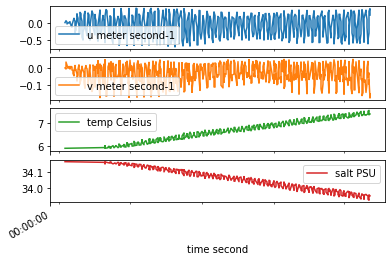

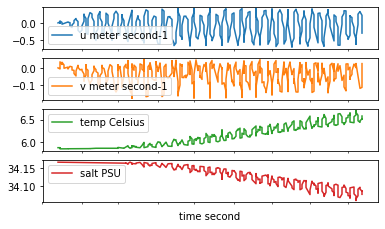

In [ ]:
plot_cols = ['u meter second-1','v meter second-1','temp Celsius','salt PSU']
plot_features = df_verano[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_verano[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

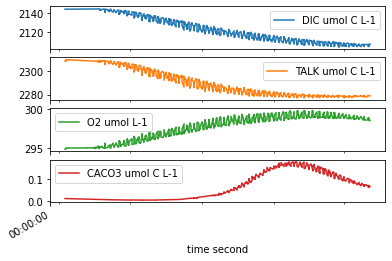

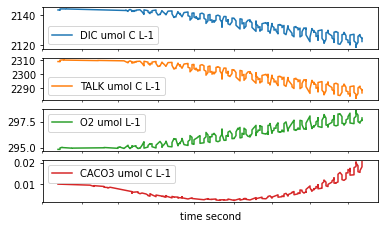

In [ ]:
plot_cols = ['DIC umol C L-1','TALK umol C L-1','O2 umol L-1','CACO3 umol C L-1']
plot_features = df_verano[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_verano[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

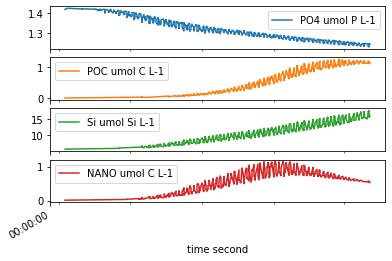

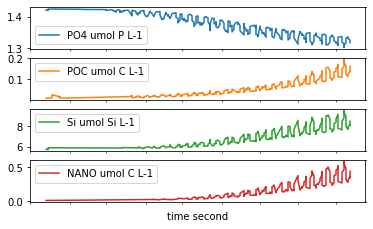

In [ ]:
plot_cols = ['PO4 umol P L-1','POC umol C L-1','Si umol Si L-1','NANO umol C L-1']
plot_features = df_verano[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_verano[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

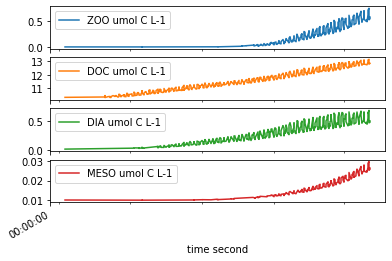

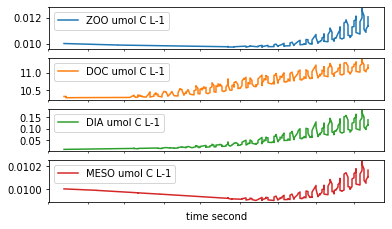

In [ ]:
plot_cols = ['ZOO umol C L-1','DOC umol C L-1','DIA umol C L-1','MESO umol C L-1']
plot_features = df_verano[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_verano[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

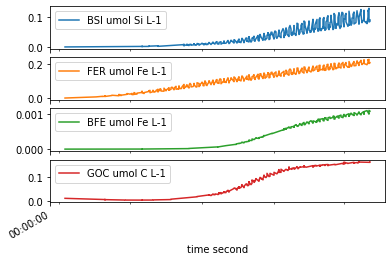

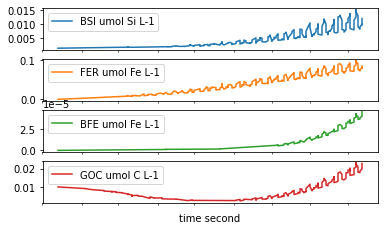

In [ ]:
plot_cols = ['BSI umol Si L-1','FER umol Fe L-1','BFE umol Fe L-1','GOC umol C L-1']
plot_features = df_verano[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_verano[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

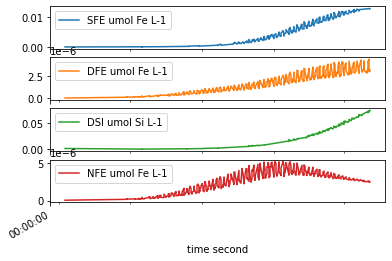

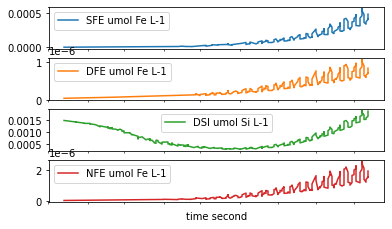

In [ ]:
plot_cols = ['SFE umol Fe L-1','DFE umol Fe L-1','DSI umol Si L-1','NFE umol Fe L-1']
plot_features = df_verano[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_verano[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

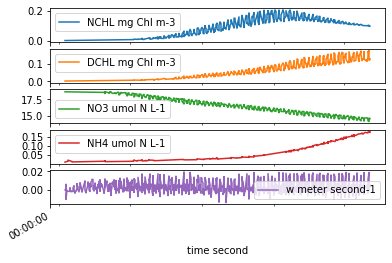

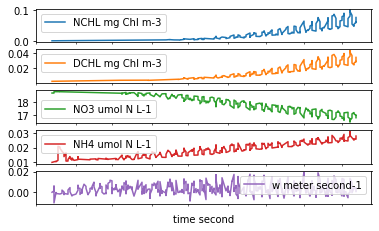

In [ ]:
plot_cols = ['NCHL mg Chl m-3','DCHL mg Chl m-3','NO3 umol N L-1','NH4 umol N L-1','w meter second-1']
plot_features = df_verano[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_verano[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

Estadísticas del conjunto de datos

In [ ]:
df_verano.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BFE umol Fe L-1,30690.0,0.000305,0.000373,4.964992e-08,1.871120e-06,6.515329e-05,0.000648,0.001100
BSI umol Si L-1,30690.0,0.029474,0.032706,1.500000e-03,2.884554e-03,1.368320e-02,0.051302,0.128013
CACO3 umol C L-1,30690.0,0.061126,0.061966,2.316417e-03,5.994334e-03,2.692228e-02,0.117461,0.182655
DCHL mg Chl m-3,30690.0,0.051405,0.047779,2.181818e-03,7.386527e-03,3.646180e-02,0.090006,0.176629
DFE umol Fe L-1,30690.0,0.000001,0.000001,5.000000e-08,1.826058e-07,9.104450e-07,0.000002,0.000004
DIA umol C L-1,30690.0,0.206453,0.190553,1.000000e-02,2.827754e-02,1.488156e-01,0.363773,0.696160
DIC umol C L-1,30690.0,2123.942395,13.290242,2.105059e+03,2.111307e+03,2.121478e+03,2136.934082,2144.519287
DOC umol C L-1,30690.0,11.358100,0.827818,1.027353e+01,1.060200e+01,1.126540e+01,12.024643,13.151708
DSI umol Si L-1,30690.0,0.013139,0.019375,2.777859e-04,7.072824e-04,2.407998e-03,0.018067,0.074651
FER umol Fe L-1,30690.0,0.094627,0.066701,3.578419e-04,2.981514e-02,9.321290e-02,0.152804,0.227091


In [ ]:
df_verano_corr = df_verano.corr()
df_verano_corr

,BFE umol Fe L-1,BSI umol Si L-1,CACO3 umol C L-1,DCHL mg Chl m-3,DFE umol Fe L-1,DIA umol C L-1,DIC umol C L-1,DOC umol C L-1,DSI umol Si L-1,FER umol Fe L-1,GOC umol C L-1,MESO umol C L-1,NANO umol C L-1,NCHL mg Chl m-3,NFE umol Fe L-1,NH4 umol N L-1,NO3 umol N L-1,O2 umol L-1,PO4 umol P L-1,POC umol C L-1,SFE umol Fe L-1,Si umol Si L-1,TALK umol C L-1,ZOO umol C L-1,salt PSU,temp Celsius,u meter second-1,v meter second-1,w meter second-1
BFE umol Fe L-1,1.000000,0.953692,0.787583,0.946301,0.946268,0.943787,-0.840754,0.936841,0.933942,0.914213,0.977612,0.917723,0.701147,0.712500,0.712594,0.972373,-0.900938,0.731779,-0.835570,0.983537,0.980843,0.943749,-0.765333,0.907123,-0.916216,0.899849,0.005512,-0.051515,0.038907
BSI umol Si L-1,0.953692,1.000000,0.710785,0.989101,0.989043,0.986904,-0.850635,0.951361,0.927447,0.927182,0.939319,0.939425,0.709791,0.720197,0.720289,0.955112,-0.913582,0.754917,-0.845833,0.980222,0.976021,0.972460,-0.768934,0.949680,-0.932521,0.913588,-0.153848,0.036742,0.179593
CACO3 umol C L-1,0.787583,0.710785,1.000000,0.770752,0.770828,0.775968,-0.816326,0.782407,0.527597,0.804442,0.887054,0.508694,0.900239,0.906231,0.906191,0.635244,-0.798970,0.799548,-0.781820,0.810458,0.672791,0.774113,-0.796726,0.495437,-0.800750,0.795820,0.004012,0.037283,0.012319
DCHL mg Chl m-3,0.946301,0.989101,0.770752,1.000000,1.000000,0.999879,-0.915153,0.980220,0.886078,0.967932,0.956524,0.895022,0.800624,0.808954,0.809047,0.932574,-0.958160,0.840424,-0.907447,0.984597,0.951812,0.993257,-0.850127,0.900718,-0.971396,0.958163,-0.161869,0.056838,0.179309
DFE umol Fe L-1,0.946268,0.989043,0.770828,1.000000,1.000000,0.999882,-0.915342,0.980308,0.885985,0.968052,0.956526,0.894917,0.800796,0.809120,0.809212,0.932533,-0.958296,0.840670,-0.907652,0.984577,0.951740,0.993294,-0.850374,0.900594,-0.971508,0.958301,-0.161822,0.056796,0.179269
DIA umol C L-1,0.943787,0.986904,0.775968,0.999879,0.999882,1.000000,-0.919531,0.981121,0.879918,0.969944,0.956737,0.888720,0.809011,0.817126,0.817217,0.928214,-0.960508,0.847190,-0.911233,0.983766,0.947854,0.993837,-0.855998,0.894334,-0.973344,0.960504,-0.165381,0.061029,0.181264
DIC umol C L-1,-0.840754,-0.850635,-0.816326,-0.915153,-0.915342,-0.919531,1.000000,-0.966808,-0.716616,-0.983021,-0.896994,-0.710506,-0.919806,-0.921822,-0.921956,-0.805256,0.989271,-0.981192,0.996614,-0.889446,-0.801900,-0.943919,0.990063,-0.695385,0.981936,-0.989184,0.135059,-0.067574,-0.123963
DOC umol C L-1,0.936841,0.951361,0.782407,0.980220,0.980308,0.981121,-0.966808,1.000000,0.864792,0.995474,0.951716,0.862451,0.834428,0.840613,0.840751,0.925005,-0.993561,0.904452,-0.966559,0.966748,0.925594,0.992945,-0.922882,0.853991,-0.997314,0.993521,-0.123675,0.033964,0.130338
DSI umol Si L-1,0.933942,0.927447,0.527597,0.886078,0.885985,0.879918,-0.716616,0.864792,1.000000,0.823538,0.856952,0.994153,0.487685,0.499378,0.499518,0.986176,-0.807781,0.575861,-0.726637,0.903557,0.974406,0.883438,-0.624167,0.981371,-0.828716,0.808334,-0.021048,-0.070669,0.061745
FER umol Fe L-1,0.914213,0.927182,0.804442,0.967932,0.968052,0.969944,-0.983021,0.995474,0.823538,1.000000,0.944419,0.820384,0.873152,0.878092,0.878225,0.892573,-0.998018,0.934145,-0.979995,0.950213,0.892867,0.986035,-0.948840,0.808731,-0.998928,0.998193,-0.105605,0.031445,0.125144


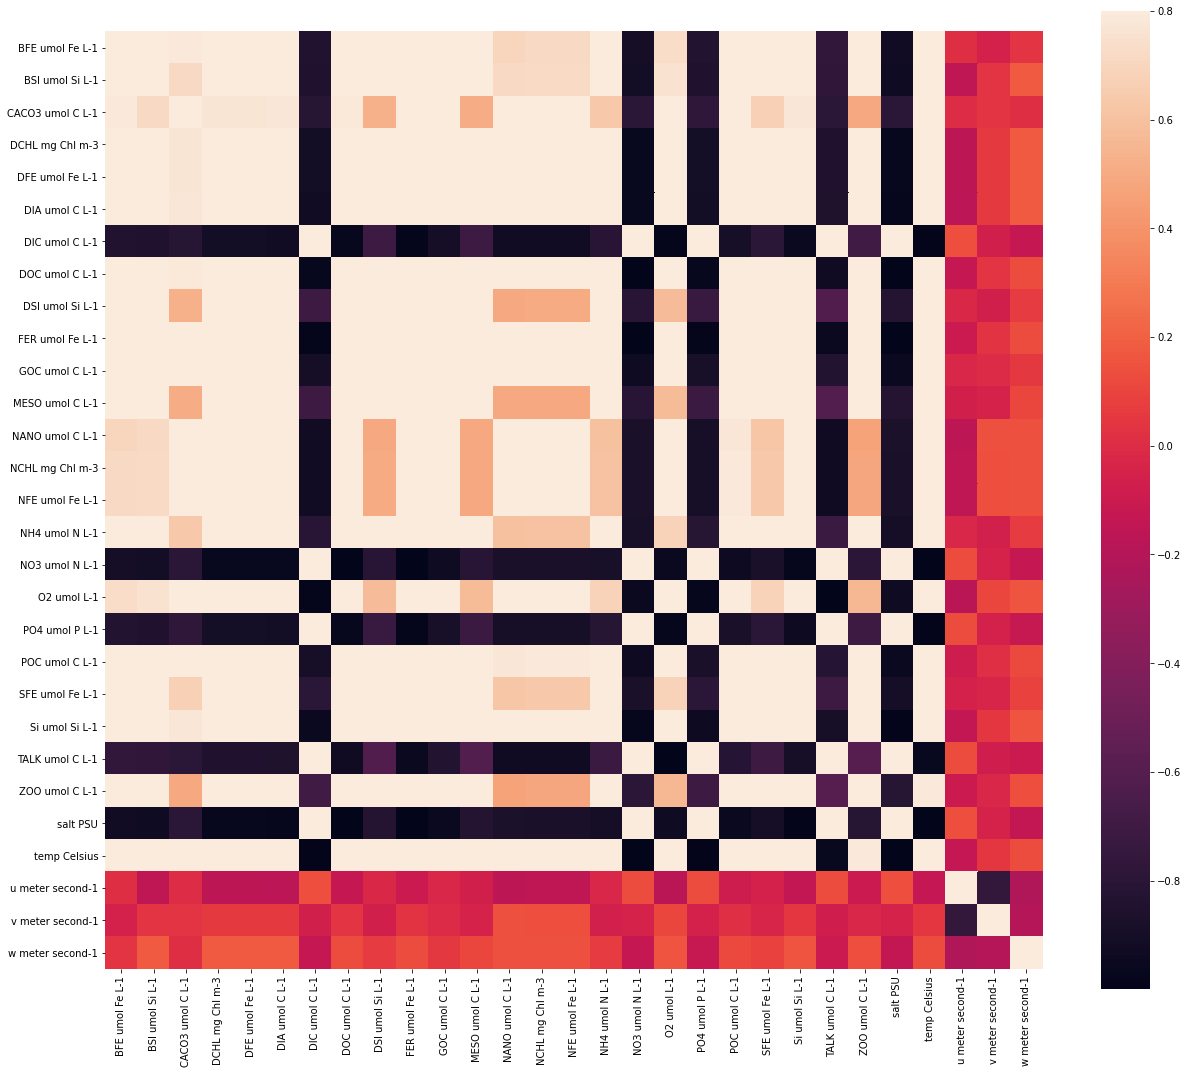

In [ ]:
f, ax = plt.subplots(figsize=(21, 18))
sns.heatmap(df_verano_corr,vmax=.8,square=True);

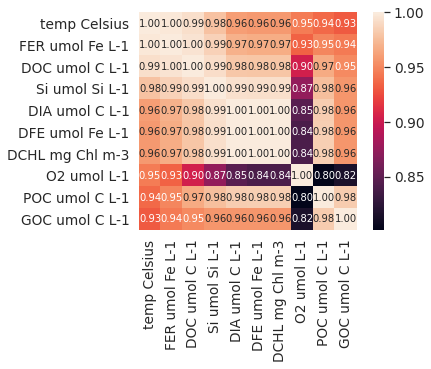

In [ ]:
k = 10 # Número de variables.
cols = df_verano_corr.nlargest(k, "temp Celsius")["temp Celsius"].index
cm = np.corrcoef(df_verano[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, 
                 fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [ ]:
df_verano_covar = df_verano.cov()
df_verano_covar

,BFE umol Fe L-1,BSI umol Si L-1,CACO3 umol C L-1,DCHL mg Chl m-3,DFE umol Fe L-1,DIA umol C L-1,DIC umol C L-1,DOC umol C L-1,DSI umol Si L-1,FER umol Fe L-1,GOC umol C L-1,MESO umol C L-1,NANO umol C L-1,NCHL mg Chl m-3,NFE umol Fe L-1,NH4 umol N L-1,NO3 umol N L-1,O2 umol L-1,PO4 umol P L-1,POC umol C L-1,SFE umol Fe L-1,Si umol Si L-1,TALK umol C L-1,ZOO umol C L-1,salt PSU,temp Celsius,u meter second-1,v meter second-1,w meter second-1
BFE umol Fe L-1,1.394337e-07,1.164697e-05,1.822368e-05,1.688295e-05,4.223516e-10,6.715426e-05,-0.004172,2.895909e-04,6.756876e-06,2.277012e-05,2.302119e-05,1.484700e-06,9.158866e-05,1.672331e-05,4.226364e-10,1.737763e-05,-0.000468,0.000425,-1.863272e-05,1.563299e-04,1.513775e-06,0.001168,-0.003385,5.849019e-05,-2.478891e-05,1.710849e-04,5.972757e-07,-9.839295e-07,8.430062e-08
BSI umol Si L-1,1.164697e-05,1.069652e-03,1.440507e-03,1.545598e-03,3.866452e-08,6.150517e-03,-0.369741,2.575737e-02,5.876959e-04,2.022647e-03,1.937367e-03,1.331149e-04,8.120835e-03,1.480560e-03,3.741700e-08,1.495028e-03,-0.041582,0.038429,-1.652019e-03,1.364624e-02,1.319345e-04,0.105429,-0.297860,5.363295e-03,-2.209814e-03,1.521352e-02,-1.460231e-03,6.146530e-05,3.408236e-05
CACO3 umol C L-1,1.822368e-05,1.440507e-03,3.839826e-03,2.281947e-03,5.709386e-08,9.162521e-03,-0.672284,4.013503e-02,6.334323e-04,3.324944e-03,3.466436e-03,1.365702e-04,1.951473e-02,3.529783e-03,8.919003e-08,1.883955e-03,-0.068900,0.077116,-2.893157e-03,2.137734e-02,1.723115e-04,0.159011,-0.584745,5.301235e-03,-3.595244e-03,2.510894e-02,7.215579e-05,1.181715e-04,4.429407e-06
DCHL mg Chl m-3,1.688295e-05,1.545598e-03,2.281947e-03,2.282810e-03,5.710984e-08,9.103279e-03,-0.581114,3.876980e-02,8.202554e-04,3.084707e-03,2.882094e-03,1.852729e-04,1.338174e-02,2.429474e-03,6.139729e-08,2.132514e-03,-0.063710,0.062500,-2.589202e-03,2.002447e-02,1.879595e-04,0.157313,-0.481084,7.431164e-03,-3.362848e-03,2.330946e-02,-2.244435e-03,1.389057e-04,4.971154e-05
DFE umol Fe L-1,4.223516e-10,3.866452e-08,5.709386e-08,5.710984e-08,1.428737e-12,2.277407e-07,-0.000015,9.700047e-07,2.051846e-08,7.718068e-08,7.210250e-08,4.634495e-09,3.348473e-07,6.079143e-08,1.536312e-12,5.334751e-08,-0.000002,0.000002,-6.478960e-08,5.009491e-07,4.701893e-09,0.000004,-0.000012,1.858824e-07,-8.413915e-08,5.832244e-07,-5.613371e-08,3.472448e-09,1.243374e-09
DIA umol C L-1,6.715426e-05,6.150517e-03,9.162521e-03,9.103279e-03,2.277407e-07,3.631042e-02,-2.328707,1.547651e-01,3.248630e-03,1.232810e-02,1.149702e-02,7.337090e-04,5.392857e-02,9.787198e-03,2.473396e-07,8.465208e-03,-0.254712,0.251269,-1.036942e-02,7.979490e-02,7.465090e-04,0.627767,-1.931926,2.942717e-02,-1.343872e-02,9.319068e-02,-9.145581e-03,5.948320e-04,2.004227e-04
DIC umol C L-1,-4.172397e-03,-3.697407e-01,-6.722836e-01,-5.811139e-01,-1.454093e-05,-2.328707e+00,176.630534,-1.063673e+01,-1.845277e-01,-8.714241e-01,-7.517956e-01,-4.091139e-02,-4.276395e+00,-7.700756e-01,-1.946184e-05,-5.122015e-01,18.297024,-20.296927,7.909876e-01,-5.031761e+00,-4.404853e-02,-41.584905,155.846900,-1.595847e+00,9.455664e-01,-6.693725e+00,5.209152e-01,-4.593622e-02,-9.559741e-03
DOC umol C L-1,2.895909e-04,2.575737e-02,4.013503e-02,3.876980e-02,9.700047e-07,1.547651e-01,-10.636730,6.852833e-01,1.387040e-02,5.496661e-02,4.968436e-02,3.093235e-03,2.416423e-01,4.374061e-02,1.105461e-06,3.664825e-02,-1.144622,1.165370,-4.778298e-02,3.406560e-01,3.166894e-03,2.724762,-9.048644,1.220736e-01,-5.981954e-02,4.187648e-01,-2.971168e-02,1.438135e-03,6.260753e-04
DSI umol Si L-1,6.756876e-06,5.876959e-04,6.334323e-04,8.202554e-04,2.051846e-08,3.248630e-03,-0.184528,1.387040e-02,3.753917e-04,1.064290e-03,1.047071e-03,8.345240e-05,3.305452e-03,6.081702e-04,1.537214e-08,9.144730e-04,-0.021781,0.017366,-8.407551e-04,7.451873e-03,7.802982e-05,0.056740,-0.143234,3.283286e-03,-1.163386e-03,7.974276e-03,-1.183463e-04,-7.003525e-05,6.941667e-06
FER umol Fe L-1,2.277012e-05,2.022647e-03,3.324944e-03,3.084707e-03,7.718068e-08,1.232810e-02,-0.871424,5.496661e-02,1.06

### División de los datos

Se usara una división de (70%, 20%, 10%) para losconjuntos de entrenamiento, validación y test.
1. Garantizar que sea posible dividir los datos en ventanas de muestras consecutivas.
2. Garantizar que los resultados de la validación / test sean más realistas y se evalúen en función de los datos recopilados después de que el modelo fue entrenado. 

In [ ]:
column_indices = {name: i for i, name in enumerate(df_verano.columns)}

n = len(df_verano)
train_df_verano = df_verano[0:int(n*0.7)]
val_df_verano = df_verano[int(n*0.7):int(n*0.9)]
test_df_verano = df_verano[int(n*0.9):]

num_features = df_verano.shape[1]

### Normalización de los datos

In [ ]:
train_mean_df_verano = train_df_verano.mean()
train_std_df_verano = train_df_verano.std()

train_df_verano = (train_df_verano - train_mean_df_verano) / train_std_df_verano
val_df_verano = (val_df_verano - train_mean_df_verano) / train_std_df_verano
test_df_verano = (test_df_verano - train_mean_df_verano) / train_std_df_verano

 Chequeo de la distribución de las funciones

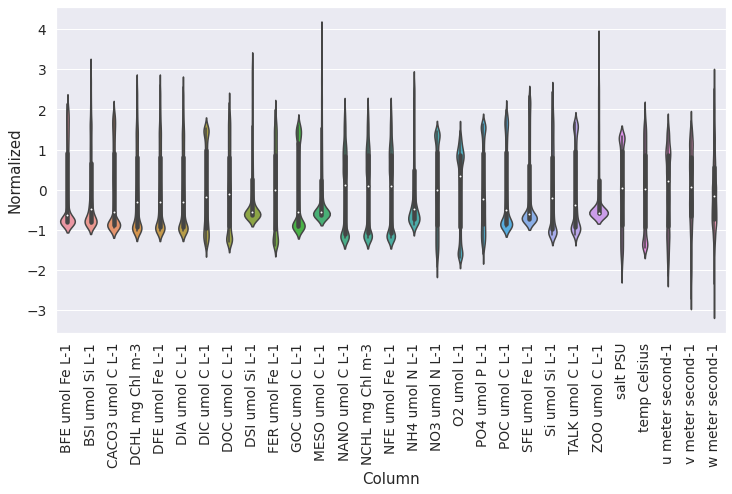

In [ ]:
df_std_verano = (df_verano - train_mean_df_verano) / train_std_df_verano
df_std_verano = df_std_verano.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_verano)
_ = ax.set_xticklabels(df_verano.keys(), rotation=90)

### Ventana de datos

Los modelos que se evaluaran estan basados en una ventadan de muestra consecutivas de datos.
Entre las principales caracteristicas de las ventanas son:
- El ancho (número de pasos de tiempo) de las ventanas de entra y etiqueta.
- El tiempo de compensación entre ellos.
- Dichas caracteristicas se utilizan como entradas, etiquetas o ambas.

La clase WindowsGenerator puede:
1. Manejar los indices y compensaciones.
2. Dividir las ventanas de entidades en pares(features, labels).
3. Trazar el contenido de las ventanas resultantes.
4. Generar de manera mas eficiente lotes de estas ventanas a partir de los datos de entrenamiento, evaluación y test, utilizando tf.data.Dataset.

#### 1. índice y compesaciones 
Se crea la clase WindowGenerator . El método __init__ incluye toda la lógica necesaria para los índices de entrada y etiqueta.

También toma los marcos de datos de entrenamiento, evaluación y test como entrada. Estos se convertirán a tf.data.Dataset de Windows más adelante.

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df_verano, val_df=val_df_verano, test_df=test_df_verano,
               label_columns=None):
    # Store the raw data.
    self.train_df_verano = train_df_verano
    self.val_df_verano = val_df_verano
    self.test_df_verano = test_df_verano

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df_verano.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

Creación de las ventanas teniendo en cuenta 24 horas de entrada para salida de 24 horas posterior en salida

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['temp Celsius'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['temp Celsius']

Creación de una ventana de predicción de una hora en el futuro dada 6 horas de historia

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['temp Celsius'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['temp Celsius']

#### 2. Dividir 
Dada una lista de entradas consecutivas, el método split_window convertirá en una ventana de entradas y una ventana de etiquetas.

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df_verano[:w2.total_window_size]),
                           np.array(train_df_verano[100:100+w2.total_window_size]),
                           np.array(train_df_verano[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 29)
Inputs shape: (3, 6, 29)
labels shape: (3, 1, 1)


Por lo general, los datos en TensorFlow se empaquetan en arreglos donde el índice más externo está en los ejemplos (la dimensión "lote"). Los índices intermedios son las dimensiones de "tiempo" o "espacio" (ancho, alto). Los índices más internos son las características.

El código anterior tomó un lote de 3 ventanas de 7 pasos de tiempo, con 19 funciones en cada paso de tiempo. Los dividió en un lote de 6 pasos de tiempo, 19 entradas de funciones y una etiqueta de 1 paso de tiempo y 1 función. La etiqueta solo tiene una característica porque WindowGenerator se inicializó con label_columns=['temp Celsius'] .

#### 3.Parcela
Aquí hay un método de trazado que permite una visualización simple de la ventana dividida

In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='temp Celsius', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

Este gráfico alinea las entradas, las etiquetas y las predicciones (posteriores) en función del tiempo al que se refiere el elemento:

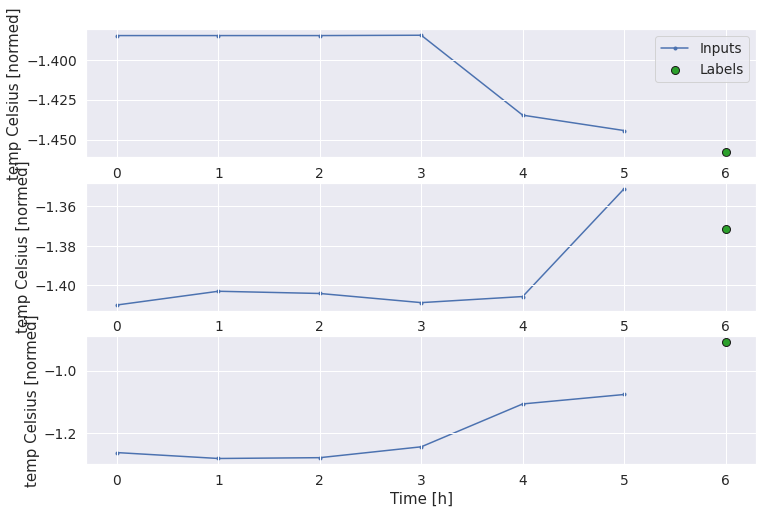

In [ ]:
w2.plot()

Puede trazar las otras columnas, pero la configuración de la ventana de ejemplo w2 solo tiene etiquetas para la columna temp Celsius.

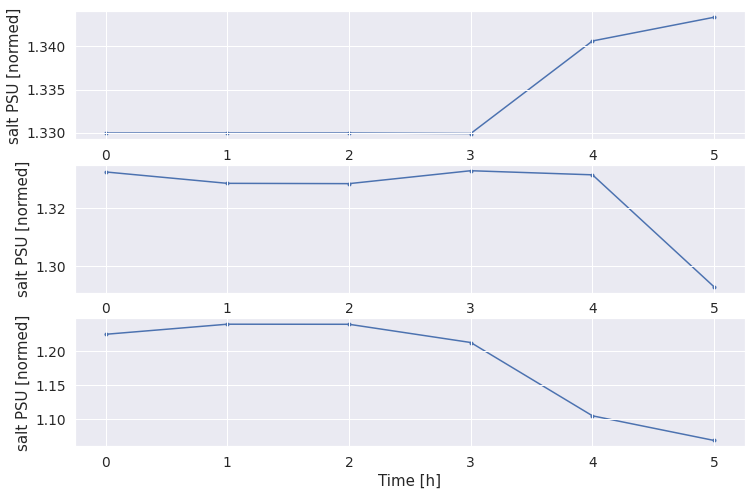

In [ ]:
w2.plot(plot_col='salt PSU')

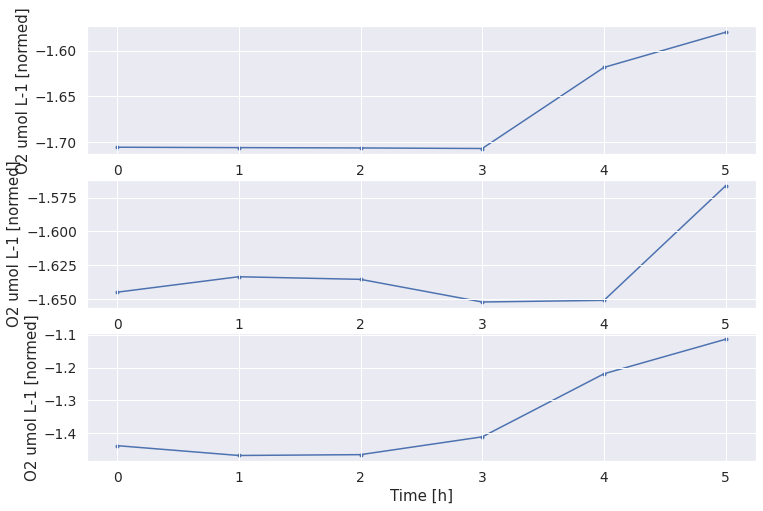

In [ ]:
w2.plot(plot_col='O2 umol L-1')

#### 4.Cree tf.data.Dataset
Finalmente, este método make_dataset tomará un DataFrame serie DataFrame y lo convertirá en untf.data.Dataset de (input_window, label_window) usando la función preprocessing.timeseries_dataset_from_array 

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

El objeto WindowGenerator contiene datos de entrenamiento, validación y test. Se Agregan propiedades para acceder a ellas como tf.data.Datasets usando el método make_dataset anterior. También se agrega un lote de ejemplo estándar para facilitar el acceso y el trazado:

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df_verano)

@property
def val(self):
  return self.make_dataset(self.val_df_verano)

@property
def test(self):
  return self.make_dataset(self.test_df_verano)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Ahora el objeto WindowGenerator le da acceso a los objetostf.data.Dataset , para que pueda iterar fácilmente sobre los datos.

La propiedad Dataset.element_spec le indica la estructura, los dtypes y las formas de los elementos del conjunto de datos.

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 29), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

La iteración sobre un Dataset produce lotes concretos:

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 29)
Labels shape (batch, time, features): (32, 1, 1)


### Modelos de un solo paso
El modelo más simple que puede construir a partir de este tipo de datos es uno que predice el valor de una sola característica, 1 paso de tiempo (1h) en el futuro basado solo en las condiciones actuales.

Así que comience por construir modelos para predecir el valor de temp Celsius 1h en el futuro.

Se configura un objeto WindowGenerator para producir estos pares de un solo paso (input, label) :

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['temp Celsius'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['temp Celsius']

El objeto de window crea tf.data.Datasets partir de los conjuntos de entrenamiento, validación y prueba, lo que le permite iterar fácilmente sobre lotes de datos.

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 29)
Labels shape (batch, time, features): (32, 1, 1)


#### Base
Antes de construir un modelo entrenable, sería bueno tener una línea de base de rendimiento como punto de comparación con los modelos posteriores más complicados.

Esta primera tarea consiste en predecir la temperatura 1h en el futuro dado el valor actual de todas las características. Los valores actuales incluyen la temperatura actual.

Así que se comienza con un modelo que simplemente devuelva la temperatura actual como predicción, prediciendo "Sin cambios". Esta es una línea de base razonable ya que la temperatura cambia lentamente. Por supuesto, esta línea de base no funcionará tan bien si realiza una predicción adicional en el futuro.

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

Se crea una instancia y evalúe este modelo:

In [ ]:
baseline = Baseline(label_index=column_indices['temp Celsius'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

192/192 [==============================] - 1s 3ms/step - loss: 0.0184 - mean_absolute_error: 0.0691


Eso imprimió algunas métricas de rendimiento, pero esas no le dan una idea de qué tan bien está funcionando el modelo.

WindowGenerator tiene un método de gráfico, pero los gráficos no serán muy interesantes con una sola muestra. Por lo tanto, se crea un WindowGenerator más WindowGenerator que generara ventanas de 24 horas de entradas y etiquetas consecutivas a la vez.

wide_window no cambia la forma en que opera el modelo. El modelo todavía hace predicciones 1h en el futuro basadas en un solo paso de tiempo de entrada. Aquí, el eje de time actúa como el eje de batch : cada predicción se realiza de forma independiente sin interacción entre los pasos de tiempo.

In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['temp Celsius'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['temp Celsius']

Esta ventana expandida se puede pasar directamente al mismo modelo de baseline sin ningún cambio de código. Esto es posible porque las entradas y etiquetas tienen la misma cantidad de pasos de tiempo, y la línea de base simplemente reenvía la entrada a la salida:

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 29)
Output shape: (32, 24, 1)


Al trazar las predicciones del modelo de línea de base, puede ver que son simplemente las etiquetas, desplazadas a la derecha en 1h.

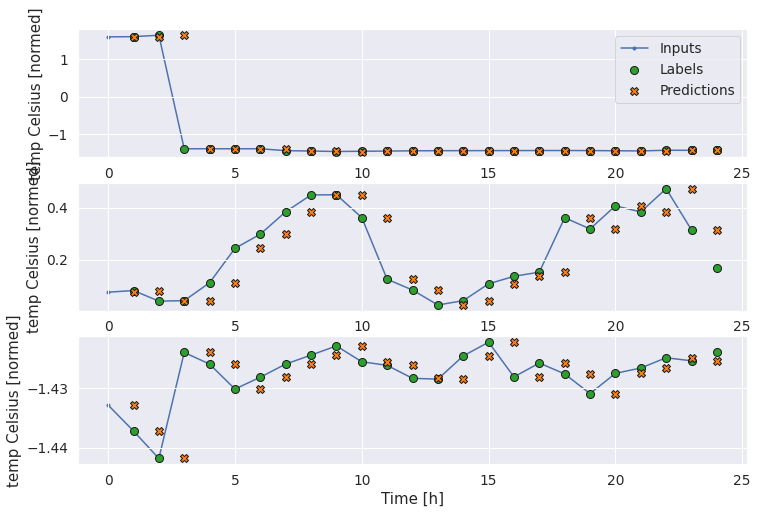

In [ ]:
wide_window.plot(baseline)

En las gráficas anteriores de tres ejemplos, el modelo de un solo paso se ejecuta en el transcurso de 24 horas. Esto merece alguna explicación:

La línea azul "Entradas" muestra la temperatura de entrada en cada paso de tiempo. El modelo recibe todas las características, este gráfico solo muestra la temperatura.
Los puntos verdes de "Etiquetas" muestran el valor de predicción objetivo. Estos puntos se muestran en el momento de la predicción, no en el momento de la entrada. Es por eso que el rango de etiquetas se desplaza 1 paso con respecto a las entradas.
Las cruces naranjas de "Predicciones" son las predicciones del modelo para cada paso de tiempo de salida. Si el modelo estuviera prediciendo perfectamente, las predicciones aterrizarían directamente en las "etiquetas".

### Modelo lineal
El modelo entrenable más simple que puede aplicar a esta tarea es insertar una transformación lineal entre la entrada y la salida. En este caso, la salida de un paso de tiempo solo depende de ese paso:

layers.Dense A. layers.Dense sin conjunto de activation es un modelo lineal. La capa solo transforma el último eje de los datos de (batch, time, inputs) a (batch, time, units) , se aplica de forma independiente a cada elemento en los ejes de batch y time .

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 29)
Output shape: (32, 1, 1)


#### Función para compilar y entrenar el modelo

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Entrene el modelo y evalúe su desempeño:

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
672/672 [==============================] - 3s 5ms/step - loss: 1.3345 - mean_absolute_error: 0.8460 - val_loss: 0.0822 - val_mean_absolute_error: 0.2410
Epoch 2/20
672/672 [==============================] - 3s 4ms/step - loss: 0.0645 - mean_absolute_error: 0.2047 - val_loss: 0.0259 - val_mean_absolute_error: 0.1163
Epoch 3/20
672/672 [==============================] - 3s 4ms/step - loss: 0.0232 - mean_absolute_error: 0.1018 - val_loss: 0.0153 - val_mean_absolute_error: 0.0762
Epoch 4/20
672/672 [==============================] - 3s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0739 - val_loss: 0.0142 - val_mean_absolute_error: 0.0716
Epoch 5/20
672/672 [==============================] - 3s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0703 - val_loss: 0.0139 - val_mean_absolute_error: 0.0698
Epoch 6/20
672/672 [==============================] - 3s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0696 - val_loss: 0.0137 - val_mean_absolute_error: 0.0691
Epoch 7/20
672/6

Al igual que el modelo de baseline , el modelo lineal se puede llamar en lotes de ventanas amplias. Usado de esta manera, el modelo hace un conjunto de predicciones independientes en pasos de tiempo consecutivos. El eje de time actúa como otro eje de batch . No hay interacciones entre las predicciones en cada paso de tiempo.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 29)
Output shape: (32, 24, 1)


Aquí está la gráfica de sus predicciones de ejemplo en wide_window , observe cómo en muchos casos la predicción es claramente mejor que simplemente devolver la temperatura de entrada, pero en algunos casos es peor:


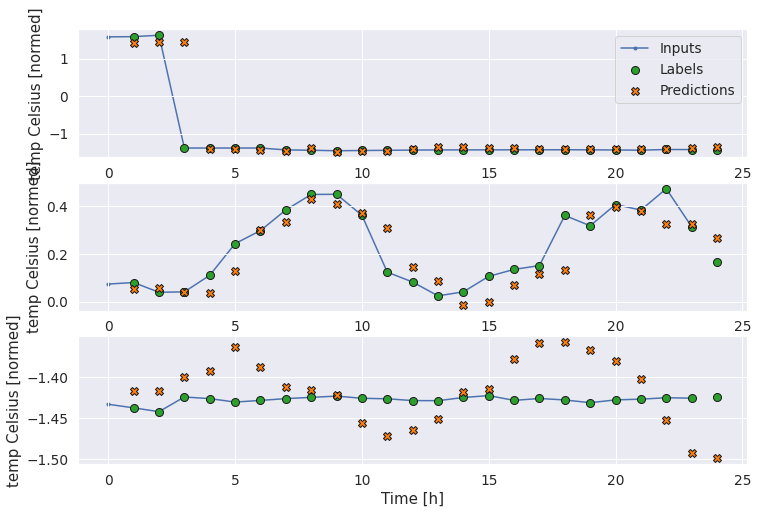

In [ ]:
wide_window.plot(linear)

Una ventaja de los modelos lineales es que son relativamente simples de interpretar. Puede extraer los pesos de la capa y ver el peso asignado a cada entrada:


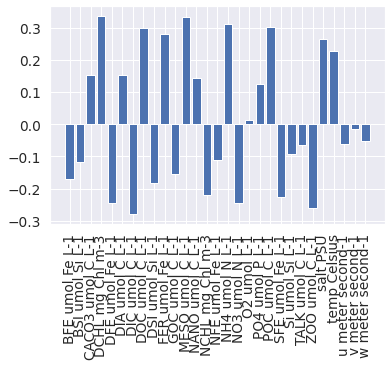

In [ ]:
plt.bar(x = range(len(train_df_verano.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df_verano.columns)))
_ = axis.set_xticklabels(train_df_verano.columns, rotation=90)

A veces, el modelo ni siquiera pone el mayor peso en la entrada temp Celsius . Este es uno de los riesgos de la inicialización aleatoria.

### Denso
Antes de aplicar modelos que realmente operan en múltiples pasos de tiempo, vale la pena verificar el rendimiento de modelos de pasos de entrada únicos más profundos y potentes.

Aquí hay un modelo similar al modelo linear , excepto que apila varias capas Dense entre la entrada y la salida:

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
672/672 [==============================] - 4s 6ms/step - loss: 0.1022 - mean_absolute_error: 0.1418 - val_loss: 0.0090 - val_mean_absolute_error: 0.0422
Epoch 2/20
672/672 [==============================] - 4s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0510 - val_loss: 0.0079 - val_mean_absolute_error: 0.0377
Epoch 3/20
672/672 [==============================] - 4s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0490 - val_loss: 0.0070 - val_mean_absolute_error: 0.0349
Epoch 4/20
672/672 [==============================] - 4s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0439 - val_loss: 0.0066 - val_mean_absolute_error: 0.0337
Epoch 5/20
672/672 [==============================] - 4s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0436 - val_loss: 0.0058 - val_mean_absolute_error: 0.0312
Epoch 6/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0465 - val_loss: 0.0056 - val_mean_absolute_error: 0.0307
Epoch 7/20
672/6

### Denso de varios pasos
Un modelo de paso de tiempo único no tiene contexto para los valores actuales de sus entradas. No puede ver cómo cambian las características de entrada con el tiempo. Para abordar este problema, el modelo necesita acceso a múltiples pasos de tiempo al hacer predicciones:
Los modelos de baseline, linear y dense manejaron cada paso de tiempo de forma independiente. Aquí el modelo tomará múltiples pasos de tiempo como entrada para producir una única salida.

Cree un WindowGenerator que producirá lotes de 3 h de entradas y 1h de etiquetas:

Tenga en cuenta que el parámetro de shift la Window es relativo al final de las dos ventanas.

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['temp Celsius'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['temp Celsius']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

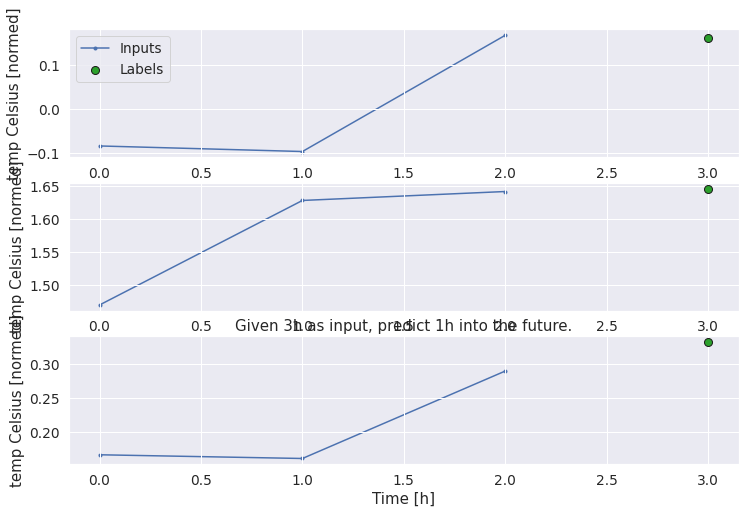

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

Puede entrenar un modelo dense en una ventana de pasos de entrada múltiple agregando layers.Flatten como la primera capa del modelo:

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 29)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

192/192 [==============================] - 1s 3ms/step - loss: 0.0084 - mean_absolute_error: 0.0277


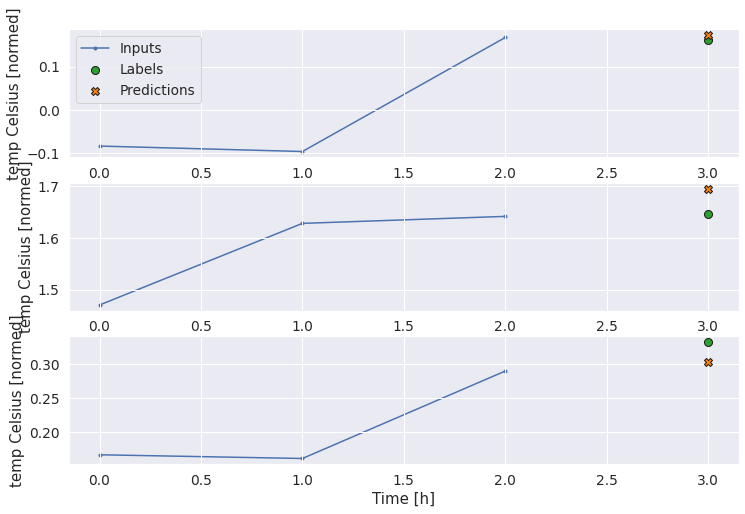

In [ ]:
conv_window.plot(multi_step_dense)

El principal inconveniente de este enfoque es que el modelo resultante solo se puede ejecutar en ventanas de entrada de exactamente esta forma.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 29)

ValueError:Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 87 but received input with shape (32, 696)


Los modelos convolucionales de la siguiente sección solucionan este problema.

### Red neuronal de convolución
Una capa de convolución ( layers.Conv1D ) también toma varios pasos de tiempo como entrada para cada predicción.

A continuación se muestra el mismo modelo que multi_step_dense , reescrito con una convolución.

Teniendo en cuenta los cambios:

- Las layers.Flatten y las primeras layers.Dense se reemplazan por layers.Conv1D .
- Las layers.Reshape ya no es necesario ya que la convolución mantiene el eje de tiempo en su salida.

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

Ejecútelo en un lote de ejemplo para ver que el modelo produce salidas con la forma esperada:

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 29)
Output shape: (32, 1, 1)


conv_window y conv_window en conv_window y debería dar un rendimiento similar al modelo multi_step_dense .

In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

192/192 [==============================] - 1s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0251


La diferencia entre este conv_model y el modelo multi_step_dense es que conv_model se puede ejecutar en entradas de cualquier longitud. La capa convolucional se aplica a una ventana deslizante de entradas:
Si lo ejecuta en una entrada más amplia, produce una salida más amplia:

In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 29)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


Teniendo en cuenta que la salida es más corta que la entrada. Para que el entrenamiento o el trazado funcionen, necesita que las etiquetas y la predicción tengan la misma longitud. Por lo tanto, WindowGenerator un WindowGenerator para producir ventanas amplias con algunos pasos de tiempo de entrada adicionales para que coincidan las longitudes de la etiqueta y la predicción:

In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['temp Celsius'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['temp Celsius']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 29)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


Ahora puede trazar las predicciones del modelo en una ventana más amplia. Tenga en cuenta los 3 pasos de tiempo de entrada antes de la primera predicción. Cada predicción aquí se basa en los 3 pasos de tiempo anteriores:

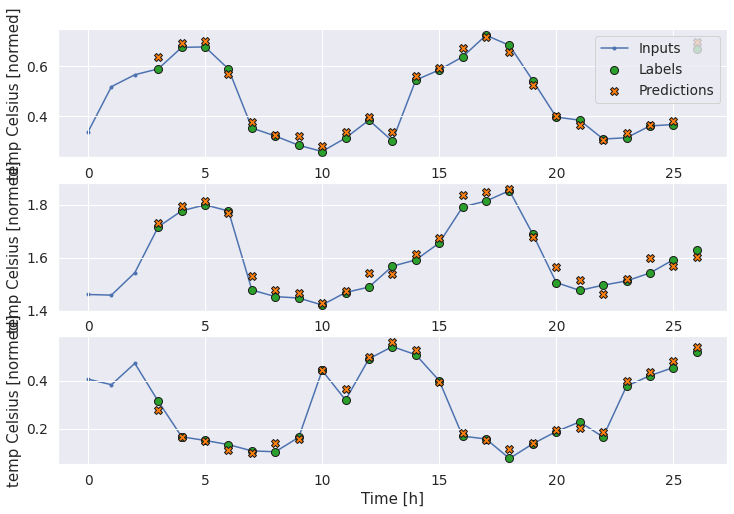

In [ ]:
wide_conv_window.plot(conv_model)

### Red neuronal recurrente
Una red neuronal recurrente (RNN) es un tipo de red neuronal muy adecuada para datos de series de tiempo. Los RNN procesan una serie de tiempo paso a paso, manteniendo un estado interno de paso de tiempo a paso de tiempo.

Se usará una capa RNN llamada Long Short Term Memory ( LSTM ).

Un argumento de constructor importante para todas las capas de keras RNN es el argumento return_sequences . Esta configuración puede configurar la capa de una de dos formas.

1. Si es False , el valor predeterminado, la capa solo devuelve el resultado del paso de tiempo final, lo que le da tiempo al modelo para calentar su estado interno antes de hacer una sola predicción:
1. Si es True la capa devuelve una salida para cada entrada. Esto es útil para:
- Apilamiento de capas RNN.
- Entrenamiento de un modelo en múltiples pasos de tiempo simultáneamente.

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

Con return_sequences=True el modelo se puede entrenar en 24 horas de datos a la vez.
Nota: Esto le dará una visión pesimista del desempeño del modelo. En el primer paso de tiempo, el modelo no tiene acceso a los pasos anteriores, por lo que no puede funcionar mejor que los modelos simples linear y dense mostrados anteriormente.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 29)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

192/192 [==============================] - 1s 4ms/step - loss: 8.2347e-04 - mean_absolute_error: 0.0149


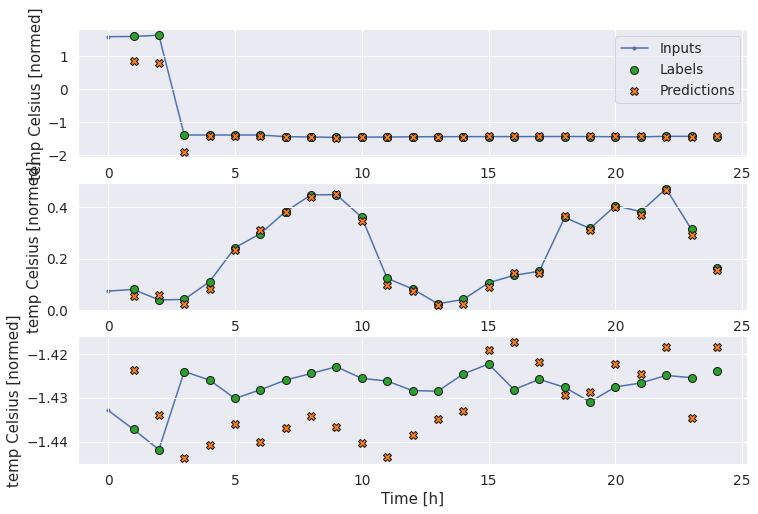

In [ ]:
wide_window.plot(lstm_model)

### Actuación
Con este conjunto de datos, cada uno de los modelos funciona ligeramente mejor que el anterior.

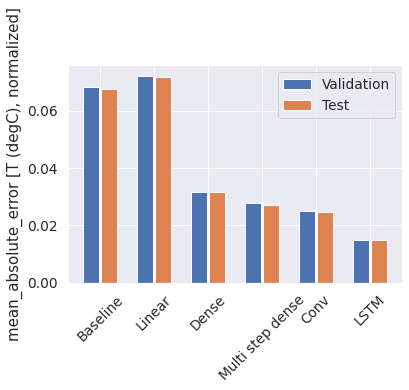

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0677
Linear      : 0.0717
Dense       : 0.0317
Multi step dense: 0.0273
Conv        : 0.0248
LSTM        : 0.0148


## Modelos de múltiples salidas
Hasta ahora, todos los modelos predijeron una característica de salida única, temp Celsius, para un solo paso de tiempo.

Todos estos modelos se pueden convertir para predecir múltiples características simplemente cambiando el número de unidades en la capa de salida y ajustando las ventanas de entrenamiento para incluir todas las características en las labels .

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 29)
Labels shape (batch, time, features): (32, 24, 29)


Teniendo en cuenta que el eje de features de las etiquetas ahora tiene la misma profundidad que las entradas, en lugar de 1.

### Base
Aquí se puede utilizar el mismo modelo de referencia, pero esta vez repitiendo todas las funciones en lugar de seleccionar un label_index específico.

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

192/192 [==============================] - 1s 3ms/step - loss: 0.0862 - mean_absolute_error: 0.1212


### Denso

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

192/192 [==============================] - 1s 3ms/step - loss: 0.0140 - mean_absolute_error: 0.0546


### RNN

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

192/192 [==============================] - 1s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0353

CPU times: user 2min 4s, sys: 20.9 s, total: 2min 25s
Wall time: 1min 39s


### Avanzado: conexiones residuales
El modelo de Baseline anterior aprovechó el hecho de que la secuencia no cambia drásticamente de un paso de tiempo a otro. Todos los modelos entrenados hasta ahora se inicializaron aleatoriamente y luego tuvieron que aprender que el resultado es un pequeño cambio con respecto al paso de tiempo anterior.

Si bien puede solucionar este problema con una inicialización cuidadosa, es más sencillo integrarlo en la estructura del modelo.

Es común en el análisis de series de tiempo construir modelos que en lugar de predecir el siguiente valor, predicen cómo cambiará el valor en el siguiente paso de tiempo. De manera similar, las "redes residuales" o "ResNets" en el aprendizaje profundo se refieren a arquitecturas en las que cada capa se suma al resultado acumulado del modelo.

Así es como se aprovecha el conocimiento de que el cambio debe ser pequeño.

Básicamente, esto inicializa el modelo para que coincida con la Baseline . Para esta tarea, ayuda a que los modelos converjan más rápido, con un rendimiento ligeramente mejor.

Este enfoque se puede utilizar junto con cualquier modelo analizado.

Aquí se está aplicando al modelo LSTM, tenga en cuenta el uso de tf.initializers.zeros para garantizar que los cambios iniciales previstos sean pequeños y no dominen la conexión residual. Aquí no hay preocupaciones de ruptura de simetría para los gradientes, ya que los ceros solo se usan en la última capa.



In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

192/192 [==============================] - 1s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0311

CPU times: user 2min 7s, sys: 21.6 s, total: 2min 28s
Wall time: 1min 41s


### Actuación
A continuación, se muestra el rendimiento general de estos modelos de múltiples salidas.

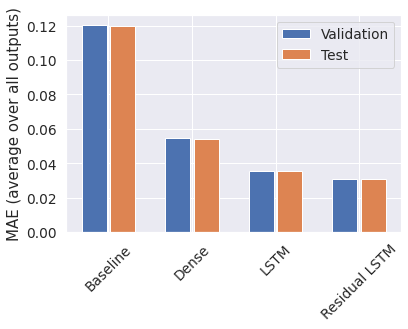

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1200
Dense          : 0.0543
LSTM           : 0.0353
Residual LSTM  : 0.0311


Los rendimientos anteriores se promedian en todos los resultados del modelo.

### Modelos de varios pasos
Tanto el modelo de salida única como el de salida múltiple de las secciones anteriores hicieron predicciones de paso de tiempo único , 1h en el futuro.

Esta sección analiza cómo expandir estos modelos para hacer predicciones de múltiples pasos de tiempo .

En una predicción de varios pasos, el modelo debe aprender a predecir un rango de valores futuros. Por lo tanto, a diferencia de un modelo de un solo paso, donde solo se predice un único punto futuro, un modelo de varios pasos predice una secuencia de los valores futuros.

Hay dos enfoques aproximados para esto:

Predicciones de un solo disparo donde se predice toda la serie de tiempo a la vez.
Predicciones autorregresivas donde el modelo solo hace predicciones de un solo paso y su salida se retroalimenta como su entrada.
En esta sección, todos los modelos predecirán todas las características en todos los pasos de tiempo de salida .

Para el modelo de varios pasos, los datos de entrenamiento nuevamente consisten en muestras por hora. Sin embargo, aquí los modelos aprenderán a predecir las 24 horas del futuro, dadas las 24 horas del pasado.

Aquí hay un objeto Window que genera estos cortes a partir del conjunto de datos:

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

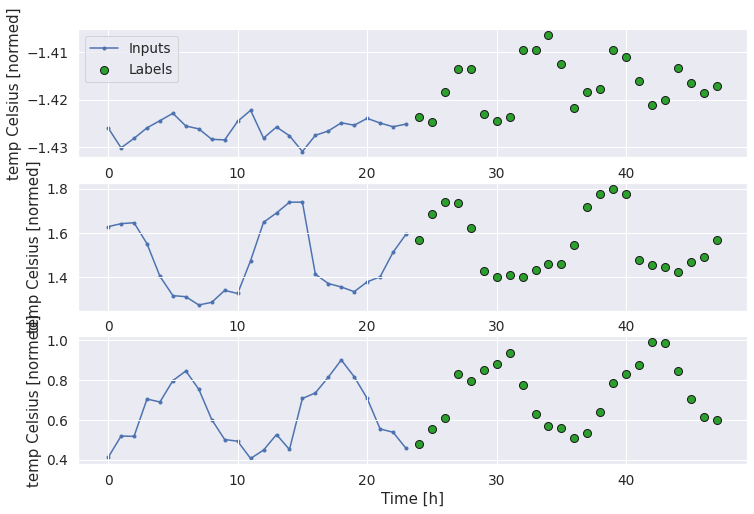

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Líneas base
Una línea de base simple para esta tarea es repetir el último paso de tiempo de entrada para el número requerido de pasos de tiempo de salida:

191/191 [==============================] - 1s 3ms/step - loss: 0.3527 - mean_absolute_error: 0.2790


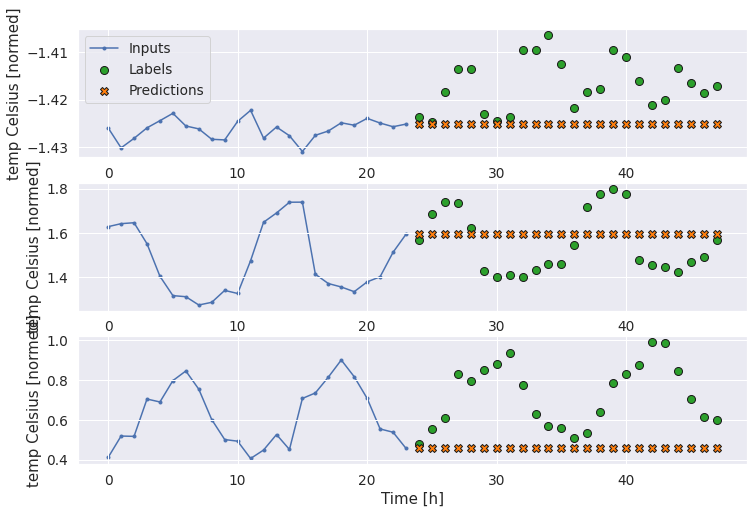

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

Dado que esta tarea es predecir 24 horas dadas 24 horas, otro enfoque simple es repetir el día anterior, asumiendo que mañana será similar:

191/191 [==============================] - 1s 3ms/step - loss: 0.2144 - mean_absolute_error: 0.1868


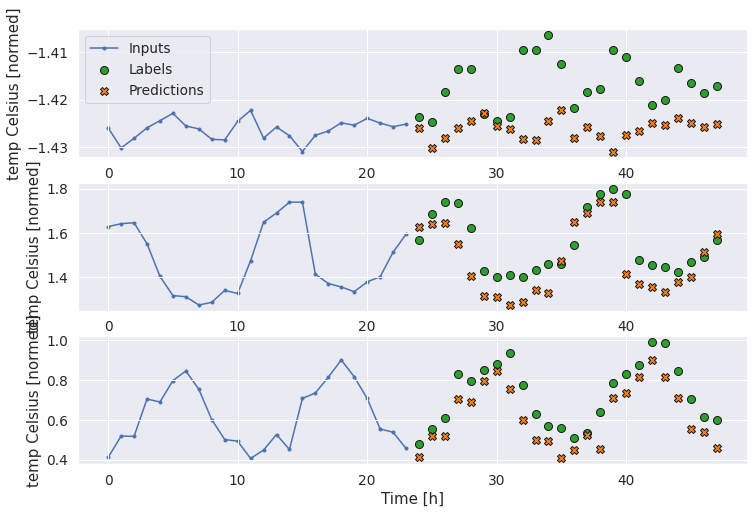

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Modelos de disparo único
Un enfoque de alto nivel para este problema es utilizar un modelo de "disparo único", donde el modelo hace la predicción de la secuencia completa en un solo paso.

Esto se puede implementar de manera eficiente como layers.Dense con OUT_STEPS*features unidades de salida. El modelo solo necesita remodelar esa salida a la requerida (OUTPUT_STEPS, features) .



### Lineal
Un modelo lineal simple basado en el último paso de tiempo de entrada funciona mejor que cualquier línea de base, pero no tiene suficiente potencia. El modelo necesita predecir los pasos de tiempo OUTPUT_STEPS , a partir de un solo paso de tiempo de entrada con una proyección lineal. Solo puede capturar un segmento de baja dimensión del comportamiento, probablemente basado principalmente en la hora del día y la época del año.

191/191 [==============================] - 1s 3ms/step - loss: 0.1281 - mean_absolute_error: 0.1882


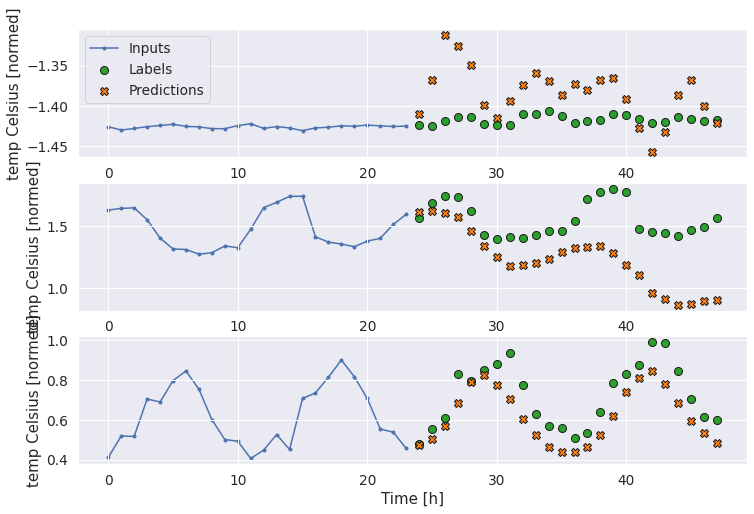

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Denso
Se agrega un layers.Dense La layers.Dense entre la entrada y la salida le da al modelo lineal más potencia, pero aún se basa en un solo paso de tiempo de entrada.

191/191 [==============================] - 1s 4ms/step - loss: 0.0429 - mean_absolute_error: 0.1129


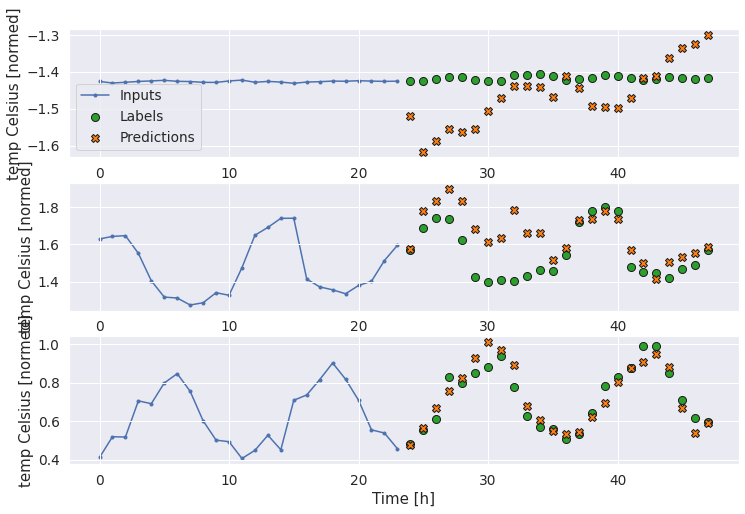

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### CNN
Un modelo convolucional hace predicciones basadas en un historial de ancho fijo, lo que puede conducir a un mejor rendimiento que el modelo denso, ya que puede ver cómo cambian las cosas con el tiempo:

191/191 [==============================] - 1s 3ms/step - loss: 0.0259 - mean_absolute_error: 0.0864


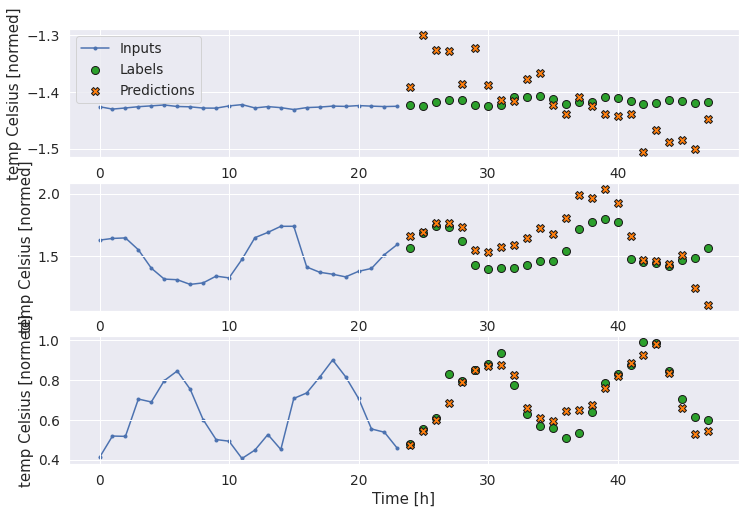

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

### RNN
Un modelo recurrente puede aprender a usar un largo historial de entradas, si es relevante para las predicciones que hace el modelo. Aquí, el modelo acumulará el estado interno durante 24 h, antes de realizar una única predicción para las próximas 24 h.

En este formato de un solo disparo, el LSTM solo necesita producir una salida en el último paso de tiempo, así que configure return_sequences=False .

191/191 [==============================] - 1s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0670


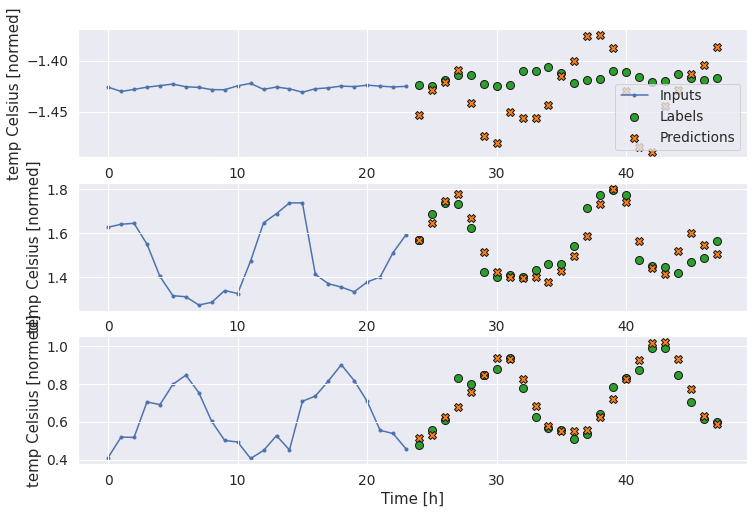

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### Avanzado: modelo autorregresivo
Todos los modelos anteriores predicen la secuencia de salida completa en un solo paso.

En algunos casos, puede ser útil que el modelo descomponga esta predicción en pasos de tiempo individuales. Luego, la salida de cada modelo se puede retroalimentar en cada paso y se pueden hacer predicciones condicionadas al anterior, como en el clásico Generar secuencias con redes neuronales recurrentes .

Una clara ventaja de este estilo de modelo es que se puede configurar para producir resultados con una longitud variable.

Puede tomar cualquiera de los modelos de salida múltiple de un solo paso entrenados en la primera mitad de este tutorial y ejecutarlo en un ciclo de retroalimentación autorregresivo, pero aquí se enfocará en construir un modelo que haya sido entrenado explícitamente para hacer eso.

Retroalimentar la salida de un modelo a su entrada

### RNN
Solo se crea un modelo RNN autorregresivo, pero este patrón se puede aplicar a cualquier modelo que haya sido diseñado para generar un solo paso de tiempo.

El modelo tendrá la misma forma básica como las de un solo paso LSTM modelos: An LSTM seguido por un layers.Dense que convierte los LSTM salidas a las predicciones del modelo.

Un layers.LSTM es un layers.LSTMCell envuelto en las layers.RNN nivel layers.RNN que administra el estado y los resultados de la secuencia por usted (consulte los RNN de Keras para obtener más detalles).

En este caso, el modelo tiene que administrar manualmente las entradas para cada paso, por lo que utiliza layers.LSTMCell directamente para el nivel inferior, interfaz de paso de tiempo único.

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

El primer método que necesita este modelo es un método de warmup para inicializar su estado interno en función de las entradas. Una vez entrenado, este estado capturará las partes relevantes del historial de entrada. Esto es equivalente al modelo LSTM solo paso anterior:

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

Este método devuelve una única predicción de paso de tiempo y el estado interno del LSTM:

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 29])

Con el estado del RNN y una predicción inicial, ahora puede continuar iterando el modelo alimentando las predicciones en cada paso hacia atrás como entrada.

El enfoque más simple para recopilar las predicciones de salida es usar una lista de Python y tf.stack después del ciclo.

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

Pruebe este modelo en las entradas de ejemplo:

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 29)


Ahora entrena el modelo:

191/191 [==============================] - 2s 9ms/step - loss: 0.0183 - mean_absolute_error: 0.0703


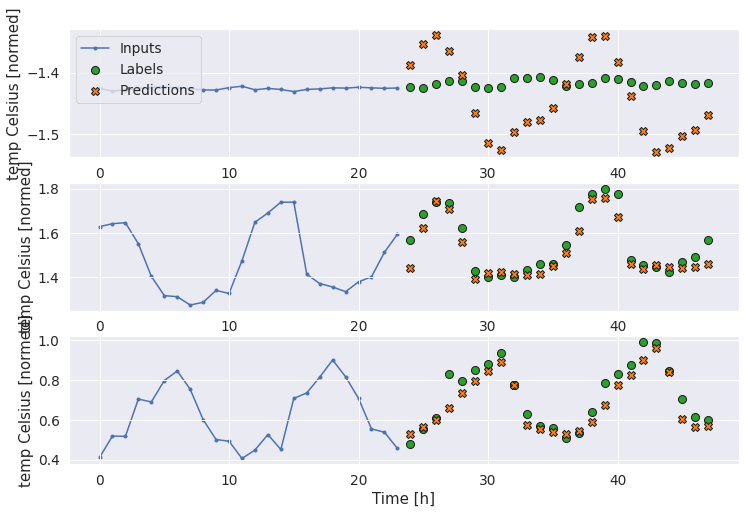

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### Actuación
Hay rendimientos claramente decrecientes en función de la complejidad del modelo sobre este problema.

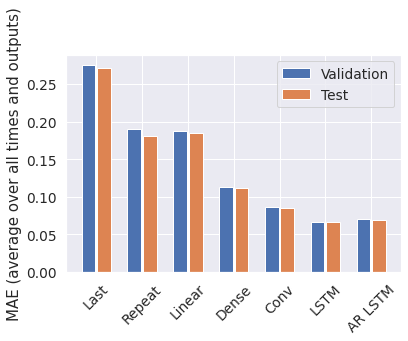

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

Las métricas para los modelos de múltiples salidas en la primera mitad de este tutorial muestran el rendimiento promedio en todas las funciones de salida. Estos desempeños son similares pero también promediados en los pasos de tiempo de salida.

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.2715
Repeat  : 0.1808
Linear  : 0.1848
Dense   : 0.1111
Conv    : 0.0847
LSTM    : 0.0664
AR LSTM : 0.0696


Las ganancias logradas al pasar de un modelo denso a modelos convolucionales y recurrentes son solo un pequeño porcentaje (si lo hay), y el modelo autorregresivo tuvo un desempeño claramente peor. Por lo tanto, es posible que estos enfoques más complejos no valgan la pena en este problema, pero no había forma de saberlo sin intentarlo, y estos modelos podrían ser útiles para su problema.